## Importing the libraries

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
import wikipedia
import pandas as pd

## Loading the nlp module

In [2]:
# English multi-task CNN trained on OntoNotes. 
# Assigns context-specific token vectors, POS tags, dependency parse and named entities.

nlp = en_core_web_sm.load()

## Loading the wikipedia data

In [3]:
# Loading Indian_Premier_League data

data = wikipedia.page("FIFA_World_Cup")
ML=data.content

## Entity Level Data Analysis

In [5]:
# Entity

doc = nlp(ML)
print([(X.text, X.label_) for X in doc.ents])

[('The FIFA World Cup', 'EVENT'), ('the World Cup', 'EVENT'), ('the Fédération Internationale de Football Association', 'ORG'), ('FIFA', 'ORG'), ('four years', 'DATE'), ('1930', 'DATE'), ('1942', 'DATE'), ('1946', 'DATE'), ('the Second World War', 'EVENT'), ('France', 'GPE'), ('second', 'ORDINAL'), ('2018', 'DATE'), ('Russia', 'GPE'), ('the preceding three years', 'DATE'), ('32', 'CARDINAL'), ('about a month', 'DATE'), ('The 21 World Cup', 'EVENT'), ('eight', 'CARDINAL'), ('Brazil', 'GPE'), ('five', 'CARDINAL'), ('World Cup', 'EVENT'), ('Germany', 'GPE'), ('Italy', 'GPE'), ('four', 'CARDINAL'), ('Argentina', 'GPE'), ('France', 'GPE'), ('two', 'CARDINAL'), ('England', 'GPE'), ('Spain', 'GPE'), ('one', 'CARDINAL'), ('The World Cup', 'EVENT'), ('the Olympic Games', 'EVENT'), ('the 2006 World Cup', 'EVENT'), ('26.29 billion', 'MONEY'), ('an estimated 715.1 million', 'CARDINAL'), ('ninth', 'ORDINAL'), ('planet.17', 'ORG'), ('the World Cup', 'EVENT'), ('Brazil', 'GPE'), ('France', 'GPE'), ('

In [7]:
# token-level entity

# BILUO tagging scheme

print([(X, X.ent_iob_, X.ent_type_) for X in doc])

[(The, 'B', 'EVENT'), (FIFA, 'I', 'EVENT'), (World, 'I', 'EVENT'), (Cup, 'I', 'EVENT'), (,, 'O', ''), (often, 'O', ''), (simply, 'O', ''), (called, 'O', ''), (the, 'B', 'EVENT'), (World, 'I', 'EVENT'), (Cup, 'I', 'EVENT'), (,, 'O', ''), (is, 'O', ''), (an, 'O', ''), (international, 'O', ''), (association, 'O', ''), (football, 'O', ''), (competition, 'O', ''), (contested, 'O', ''), (by, 'O', ''), (the, 'O', ''), (senior, 'O', ''), (men, 'O', ''), ('s, 'O', ''), (national, 'O', ''), (teams, 'O', ''), (of, 'O', ''), (the, 'O', ''), (members, 'O', ''), (of, 'O', ''), (the, 'B', 'ORG'), (Fédération, 'I', 'ORG'), (Internationale, 'I', 'ORG'), (de, 'I', 'ORG'), (Football, 'I', 'ORG'), (Association, 'I', 'ORG'), ((, 'O', ''), (FIFA, 'B', 'ORG'), (), 'O', ''), (,, 'O', ''), (the, 'O', ''), (sport, 'O', ''), ('s, 'O', ''), (global, 'O', ''), (governing, 'O', ''), (body, 'O', ''), (., 'O', ''), (The, 'O', ''), (championship, 'O', ''), (has, 'O', ''), (been, 'O', ''), (awarded, 'O', ''), (every, '

In [8]:
# entities in the article

labels = [x.label_ for x in doc.ents]
Counter(labels)

Counter({'EVENT': 148,
         'ORG': 110,
         'DATE': 232,
         'GPE': 176,
         'ORDINAL': 60,
         'CARDINAL': 166,
         'MONEY': 6,
         'NORP': 34,
         'PERSON': 42,
         'LOC': 50,
         'WORK_OF_ART': 6,
         'PRODUCT': 4,
         'LAW': 1,
         'FAC': 5,
         'QUANTITY': 3,
         'PERCENT': 1})

In [9]:
# most frequent tokens

items = [x.text for x in doc.ents]
Counter(items).most_common(50)

[('FIFA', 55),
 ('World Cup', 50),
 ('first', 31),
 ('two', 28),
 ('Brazil', 26),
 ('the World Cup', 23),
 ('Germany', 18),
 ('World Cups', 16),
 ('FIFA World Cup', 14),
 ('three', 13),
 ('Europe', 13),
 ('2002', 12),
 ('2014', 12),
 ('France', 11),
 ('2010', 11),
 ('third', 11),
 ('second', 10),
 ('four', 10),
 ('Mexico', 10),
 ('European', 10),
 ('South America', 10),
 ('2006', 10),
 ('1930', 9),
 ('2018', 9),
 ('Italy', 9),
 ('1970', 9),
 ('1998', 9),
 ('Argentina', 8),
 ('England', 8),
 ('one', 8),
 ('South American', 8),
 ('1938', 8),
 ('2026', 7),
 ('quarter', 7),
 ('1958', 7),
 ('eight', 6),
 ('five', 6),
 ('Spain', 6),
 ('South Korea', 6),
 ('13', 6),
 ('Asia', 6),
 ('1994', 6),
 ('1962', 6),
 ('32', 5),
 ('The World Cup', 5),
 ('Uruguay', 5),
 ('Summer Olympics', 5),
 ('North America', 5),
 ('16', 5),
 ('Africa', 5)]

In [10]:
# randomly select one sentence

sentences = [x for x in doc.sents]
print(sentences[50])

The first two World Cup matches took place simultaneously on 13 July 1930, and were won by France and the US, who defeated Mexico 4–1 and Belgium 3–0 respectively.


In [11]:
# displacy.render to generate the raw markup

displacy.render(nlp(str(sentences[50])), jupyter=True, style='ent')

In [12]:
# extract part-of-speech and lemmatize this sentence

[(x.orth_,x.pos_, x.lemma_) for x in [y 
                                      for y
                                      in nlp(str(sentences[50])) 
                                      if not y.is_stop and y.pos_ != 'PUNCT']]

[('World', 'PROPN', 'World'),
 ('Cup', 'PROPN', 'Cup'),
 ('matches', 'NOUN', 'match'),
 ('took', 'VERB', 'take'),
 ('place', 'NOUN', 'place'),
 ('simultaneously', 'ADV', 'simultaneously'),
 ('13', 'NUM', '13'),
 ('July', 'PROPN', 'July'),
 ('1930', 'NUM', '1930'),
 ('won', 'VERB', 'win'),
 ('France', 'PROPN', 'France'),
 ('defeated', 'VERB', 'defeat'),
 ('Mexico', 'PROPN', 'Mexico'),
 ('4–1', 'NUM', '4–1'),
 ('Belgium', 'PROPN', 'Belgium'),
 ('3–0', 'NUM', '3–0'),
 ('respectively', 'ADV', 'respectively')]

In [13]:
dict([(str(x), x.label_) for x in nlp(str(sentences[50])).ents])


{'first': 'ORDINAL',
 'two': 'CARDINAL',
 'World Cup': 'EVENT',
 '13 July 1930': 'DATE',
 'France': 'GPE',
 'US': 'GPE',
 'Mexico': 'GPE',
 'Belgium': 'GPE'}

In [14]:
print([(x, x.ent_iob_, x.ent_type_) for x in sentences[50]])


[(The, 'O', ''), (first, 'B', 'ORDINAL'), (two, 'B', 'CARDINAL'), (World, 'B', 'EVENT'), (Cup, 'I', 'EVENT'), (matches, 'O', ''), (took, 'O', ''), (place, 'O', ''), (simultaneously, 'O', ''), (on, 'O', ''), (13, 'B', 'DATE'), (July, 'I', 'DATE'), (1930, 'I', 'DATE'), (,, 'O', ''), (and, 'O', ''), (were, 'O', ''), (won, 'O', ''), (by, 'O', ''), (France, 'B', 'GPE'), (and, 'O', ''), (the, 'O', ''), (US, 'B', 'GPE'), (,, 'O', ''), (who, 'O', ''), (defeated, 'O', ''), (Mexico, 'B', 'GPE'), (4–1, 'O', ''), (and, 'O', ''), (Belgium, 'B', 'GPE'), (3–0, 'O', ''), (respectively, 'O', ''), (., 'O', '')]


In [15]:
displacy.render(doc, jupyter=True, style='ent')


In [16]:
type(ML)

str

In [17]:
from nltk.tokenize import sent_tokenize
ML_tok=sent_tokenize(ML)

In [18]:
type(ML_tok)

list

In [19]:
df = pd.DataFrame(ML_tok) 


In [20]:
df.head()

,0
0,"The FIFA World Cup, often simply called the Wo..."
1,The championship has been awarded every four y...
2,"The current champion is France, which won its ..."
3,The current format involves a qualification ph...
4,"In the tournament phase, 32 teams, including t..."


## Visualize the common entity based location

In [21]:
# Loop to get the names from each line:

words_names = []

for line in df[0]:
    
    doc= nlp(line)
    
    names = [ent.text for ent in doc.ents if ent.label_ == 'GPE']
    
    words_names.append(names)

In [22]:
# Now we need to organize them and count their frequency

names= [line for line in words_names for line in set(line)]

names_count= Counter(names).most_common(10)

print(pd.DataFrame(names_count))

              0   1
0        Brazil  23
1       Germany  16
2        France  11
3        Mexico   9
4       England   8
5         Italy   8
6     Argentina   8
7         Spain   6
8   South Korea   6
9  South Africa   4


In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

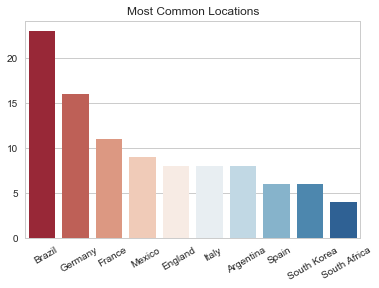

In [24]:
# visualize the common loations

labels, values= zip(*names_count)

indexes = np.arange(len(labels))
width = 1

sns.set(style="whitegrid")

ax = sns.barplot(indexes, values, palette="RdBu")

plt.xticks(indexes + width * 0.1, labels, rotation=30);
plt.tick_params(axis='x', labelsize=10)
plt.title("Most Common Locations");

In [41]:
#print(ML_tok)

## Extracting the Entities for each sentences 

In [26]:
data = pd.DataFrame(ML_tok,columns=['text']) 


In [27]:
data.head()

,text
0,"The FIFA World Cup, often simply called the Wo..."
1,The championship has been awarded every four y...
2,"The current champion is France, which won its ..."
3,The current format involves a qualification ph...
4,"In the tournament phase, 32 teams, including t..."


In [28]:
nlp = spacy.load('en_core_web_sm')


In [29]:
def extract_named_ents(text):
    
    return [(ent.text, ent.start_char, ent.end_char, ent.label_) for ent in nlp(text).ents]

def add_named_ents(df):
    
    data['named_ents'] = data['text'].apply(extract_named_ents)  

In [30]:
add_named_ents(data)

In [31]:
data.head()

,text,named_ents
0,"The FIFA World Cup, often simply called the Wo...","[(The FIFA World Cup, 0, 18, EVENT), (the Worl..."
1,The championship has been awarded every four y...,"[(every four years, 34, 50, DATE), (1930, 85, ..."
2,"The current champion is France, which won its ...","[(France, 24, 30, GPE), (second, 46, 52, ORDIN..."
3,The current format involves a qualification ph...,"[(the preceding three years, 74, 99, DATE)]"
4,"In the tournament phase, 32 teams, including t...","[(32, 25, 27, CARDINAL), (about a month, 153, ..."


For each sentence, the corresponding entities are mapped along with its Start and End Character.